# Assignment 06 - Weather

Author: Marcin Kaminski

In [ ]:
# Imports

import pandas as pd # Data analysis library
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import matplotlib.dates as mdates # Date handling in matplotlib
import seaborn as sns # Statistical data visualization library
import datetime # Date and time manipulation library

## Getting Data

In [ ]:
# Load the data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False) # low_memory to remove DtypeWarning
# We need to ignore the first 23 rows and remove DtypeWarning
# Display the first 3 rows of the dataframe
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Columns:

date:  -  Date and Time (utc)

rain:  -  Precipitation Amount (mm)

temp:  -  Air Temperature (C)

wetb:  -  Wet Bulb Temperature (C)

dewpt: -  Dew Point Temperature (C) 

rhum:  -  Relative Humidity (%)

vappr: -  Vapour Pressure (hPa)

msl:   -  Mean Sea Level Pressure (hPa)

wdsp:  -  Mean Wind Speed (knot)

wddir: -  Predominant Wind Direction (degree)

ww:    -  Synop code for Present Weather

w:     -  Synop code for Past Weather
sun:   -  Sunshine duration (hours)

vis:   -  Visibility (m)

clht:  -  Cloud height (100's of ft) - 999 if none 

clamt: -  Cloud amount

ind:   -  Indicator

In [ ]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256434 entries, 0 to 256433
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    256434 non-null  object 
 1   ind     256434 non-null  int64  
 2   rain    256434 non-null  object 
 3   ind.1   256434 non-null  int64  
 4   temp    256434 non-null  float64
 5   ind.2   256434 non-null  int64  
 6   wetb    256434 non-null  float64
 7   dewpt   256434 non-null  float64
 8   vappr   256434 non-null  float64
 9   rhum    256434 non-null  int64  
 10  msl     256434 non-null  object 
 11  ind.3   256434 non-null  int64  
 12  wdsp    256434 non-null  object 
 13  ind.4   256434 non-null  int64  
 14  wddir   256434 non-null  object 
 15  ww      256434 non-null  object 
 16  w       256434 non-null  object 
 17  sun     256434 non-null  float64
 18  vis     256434 non-null  object 
 19  clht    256434 non-null  object 
 20  clamt   256434 non-null  object 
dtypes: float64

## Cleaning Data

In [4]:
# Detect missing values
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


I am trying to drop rows with missing values, however .isnull() option does not recognize the missing values.

Solution:
https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe

In [ ]:
# Create a clean dataframe with selected columns
cleandf = df[["date", "temp", "wdsp"]].copy() # make a new dataframe with only the date, air temperature and mean wind speed
cleandf.head(5) # display the first 5 rows of the clean dataframe

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0
3,31-jul-1996 10:00,12.9,0
4,31-jul-1996 11:00,14.5,0


In [ ]:
# Replace the spaces with NaN in the 'wdsp' column
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan) 
# Drop rows with any NaN values
cleandf.dropna(inplace=True) 

#cleandf.head(5) # check the new dataframe


In [ ]:
# Convert 'date' column to datetime format
cleandf = cleandf.copy() # to avoid SettingWithCopyWarning
cleandf['date'] = pd.to_datetime(cleandf['date'], format='%d-%b-%Y %H:%M', errors='coerce') # format to match the date strings and coerce errors to NaT

In [ ]:
# Convert "wdsp" column to float
cleandf["wdsp"] = cleandf["wdsp"].astype(float)

In [ ]:
# Display clean dataframe information
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256384 entries, 0 to 256433
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    256384 non-null  datetime64[ns]
 1   temp    256384 non-null  float64       
 2   wdsp    256384 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.8 MB


## Analysing Data

In [ ]:
# Display the columns of the clean dataframe
cleandf.columns.tolist()

['date', 'temp', 'wdsp']

In [ ]:
# Setting the index to the datetime

""" If you would like to do some analysis on the data based on time, 
you should set the index of the DataFrame to be the date"""

# Set 'date' as the index
cleandf.set_index('date', inplace=True)
# Display the first 3 rows of the clean dataframe
cleandf.head(3)

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0


### Temperature

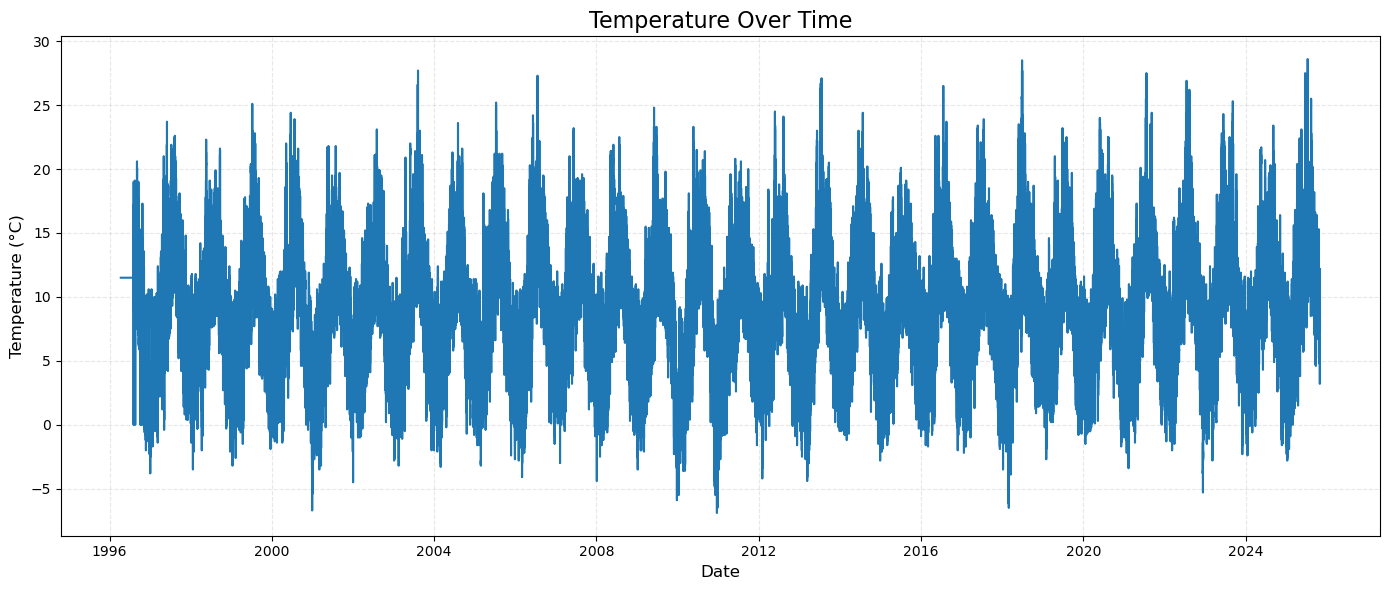

In [ ]:
# Plotting temperature over time
plt.figure(figsize=(14, 6)) # set the figure size
sns.lineplot(data=cleandf, x="date", y="temp") # plot temperature over time

plt.title("Temperature Over Time", fontsize=16) # title of the plot
plt.xlabel("Date", fontsize=12) # x-axis label
plt.ylabel("Temperature (°C)", fontsize=12) # y-axis label

plt.grid(True, which="both", linestyle="--", alpha=0.3) # add grid lines

plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot

### Rolling Temperature (24h Moving Average Temperature)

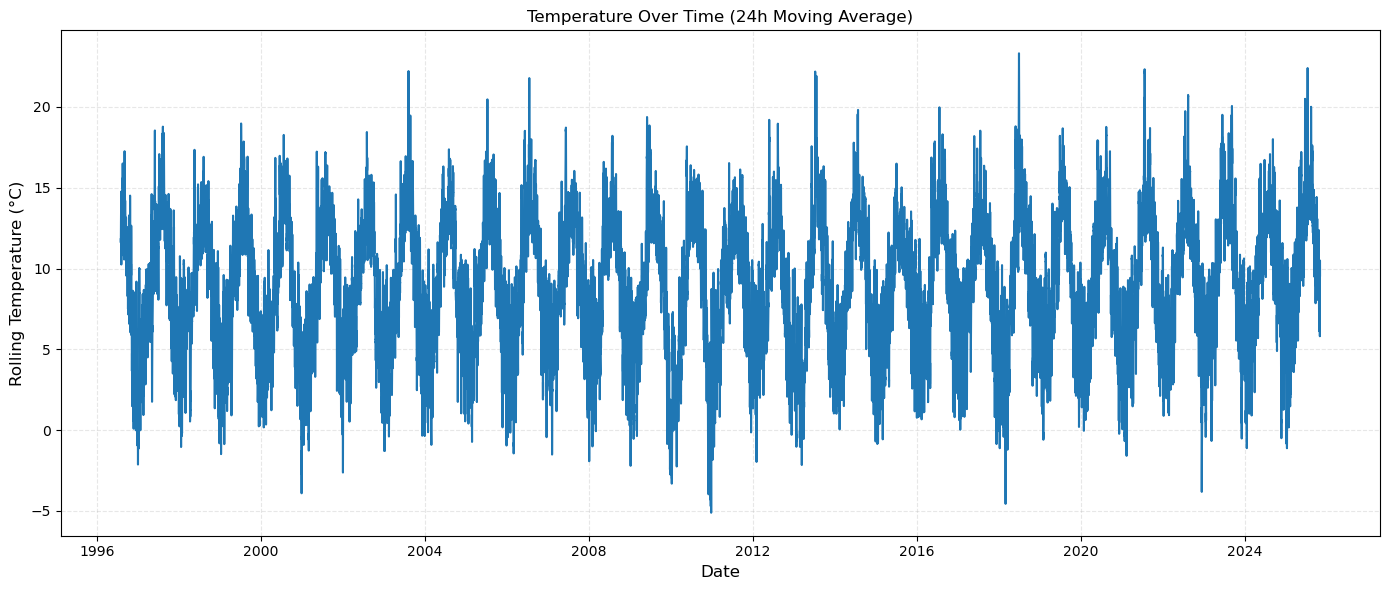

In [ ]:
# Smoothing the line (moving average) to reduce noise

# Calculate rolling mean with a window of 24 hours
cleandf['temp_smooth'] = cleandf['temp'].rolling(window=24, center=True).mean()

plt.figure(figsize=(14, 6)) # set the figure size
sns.lineplot(data=cleandf, x="date", y="temp_smooth") # plot smoothed temperature over time

plt.title("Temperature Over Time (24h Moving Average)") # title of the plot
plt.xlabel("Date", fontsize=12) # x-axis label
plt.ylabel("Rolling Temperature (°C)", fontsize=12) # y-axis label
plt.grid(True, linestyle='--', alpha=0.3) # add grid lines
plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot

### Mean Temperature Each Day

In [ ]:
# Getting mean temperature each day

# Calculate daily mean temperature
daily_mean_temp = cleandf.resample('D')['temp'].mean().reset_index() # reset_index to turn the index back into a column

Resampling: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

Offset aliases: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

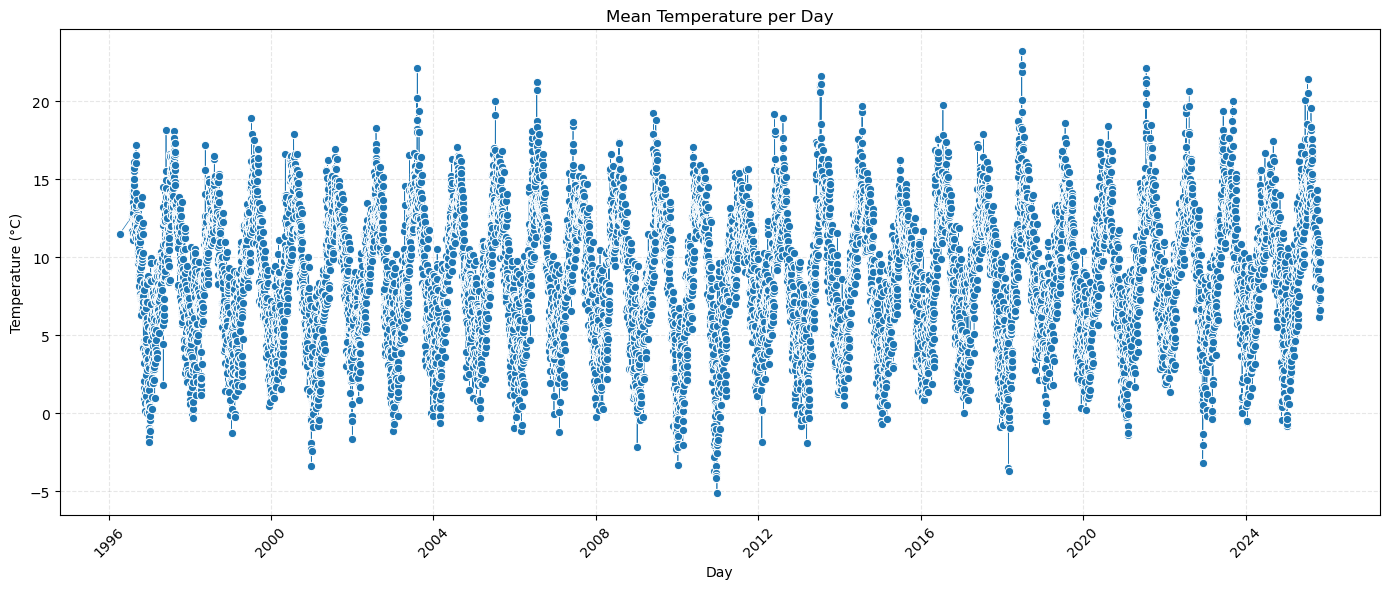

In [ ]:
# Plot daily mean temperature
plt.figure(figsize=(14,6)) # set the figure size
sns.lineplot(data=daily_mean_temp, x='date', y='temp', linewidth=0.5, marker='o') # plot daily mean temperature with markers

plt.title("Mean Temperature per Day") # title of the plot
plt.xlabel("Day") # x-axis label
plt.ylabel("Temperature (°C)") # y-axis label
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.3) # add grid lines

plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot   

### Mean Temperature Each Month

In [ ]:
# Getting mean temperature each month

# Calculate monthly mean temperature
monthly_mean_temp = cleandf.resample('ME')['temp'].mean().reset_index() # reset_index to turn the index back into a column

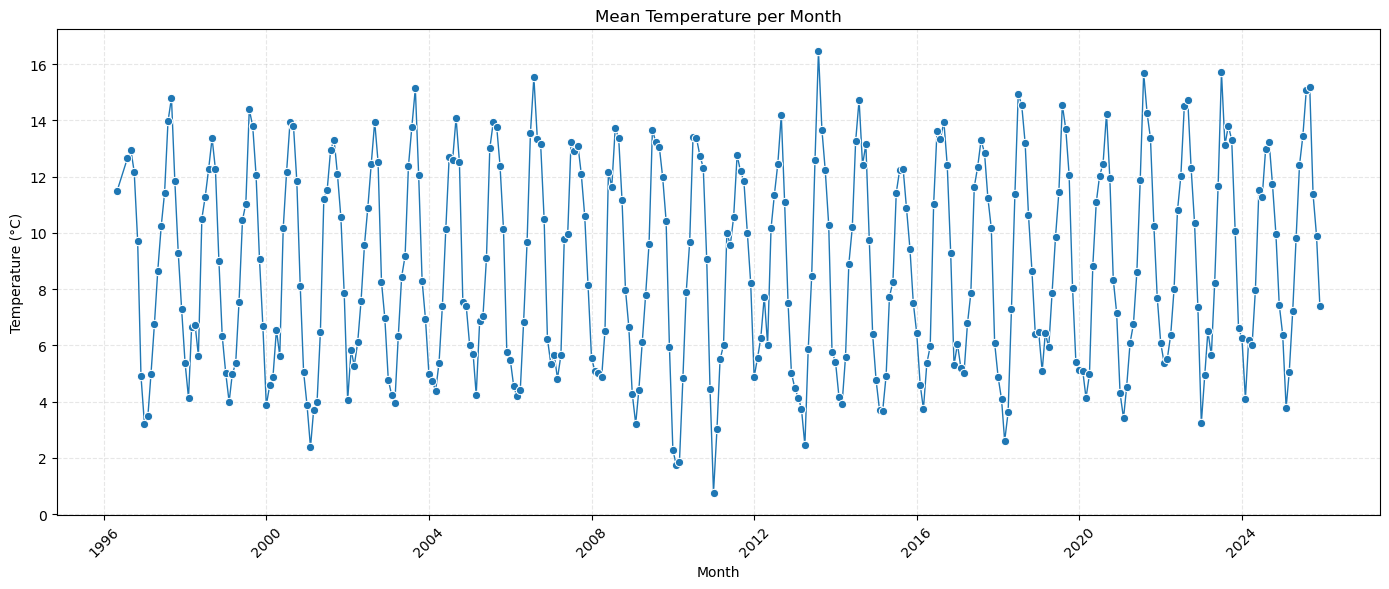

In [ ]:
# Plot monthly mean temperature
plt.figure(figsize=(14,6)) # set the figure size
sns.lineplot(data=monthly_mean_temp, x='date', y='temp', linewidth=1.0, marker='o') # plot monthly mean temperature with markers

plt.title("Mean Temperature per Month") # title of the plot
plt.xlabel("Month") # x-axis label
plt.ylabel("Temperature (°C)") # y-axis label
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.3) # add grid lines

plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot

### Mean Wind Speed

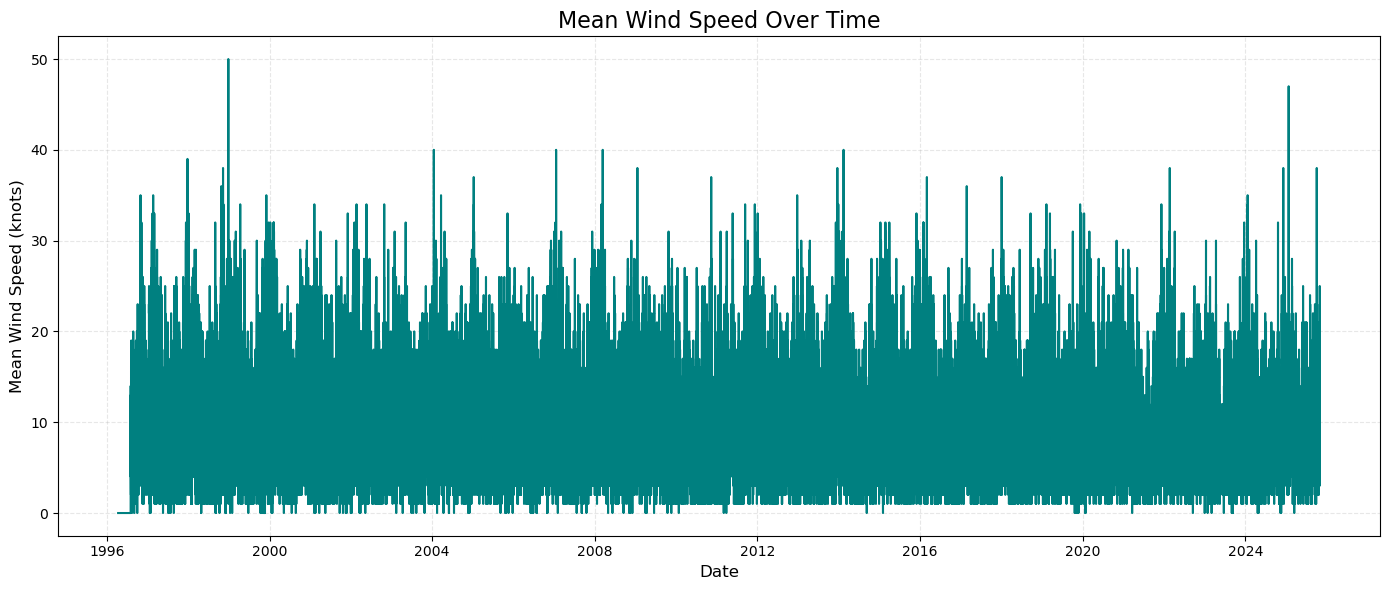

In [ ]:
# Plotting mean wind speed over time
plt.figure(figsize=(14, 6)) # set the figure size
sns.lineplot(data=cleandf, x="date", y="wdsp", color="teal") # plot wind speed over time

plt.title("Mean Wind Speed Over Time", fontsize=16) # title of the plot
plt.xlabel("Date", fontsize=12) # x-axis label
plt.ylabel("Mean Wind Speed (knots)", fontsize=12) # y-axis label

plt.grid(True, which="both", linestyle="--", alpha=0.3) # add grid lines

plt.tight_layout() # adjust layout to prevent clipping 
plt.show() # display the plot 

### Rolling Wind Speed (24h Moving Average Wind Speed)

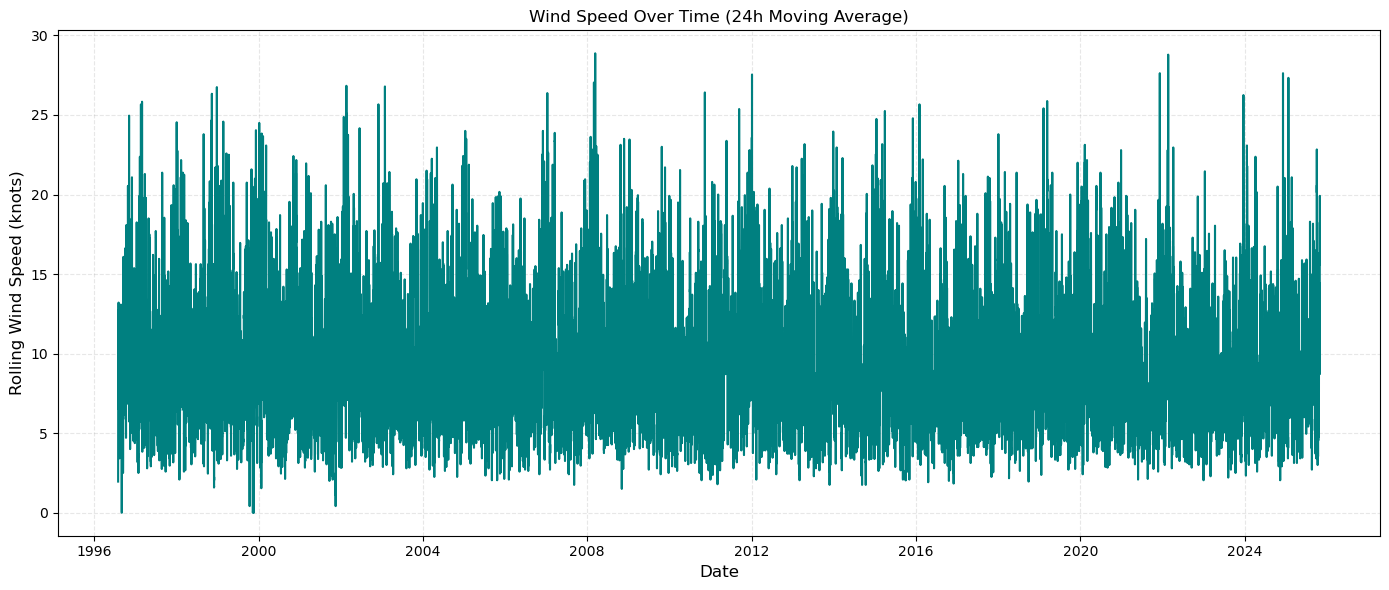

In [ ]:
# Smoothing the line (moving average) to reduce noise

# Calculate rolling mean with a window of 24 hours
cleandf['wdsp_smooth'] = cleandf['wdsp'].rolling(window=24, center=True).mean()

plt.figure(figsize=(14, 6)) # set the figure size
sns.lineplot(data=cleandf, x="date", y="wdsp_smooth", color="teal") # plot smoothed wind speed over time

plt.title("Wind Speed Over Time (24h Moving Average)") # title of the plot
plt.xlabel("Date", fontsize=12) # x-axis label
plt.ylabel("Rolling Wind Speed (knots)", fontsize=12) # y-axis label
plt.grid(True, linestyle='--', alpha=0.3) # add grid lines
plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot

### Max Wind Speed Each Day

In [ ]:
# Getting max wind speed for each day

# Calculate daily maximum wind speed
daily_max_wdsp = cleandf.resample('D')['wdsp'].max().reset_index() # reset_index to turn the index back into a column

# Set proper column names
daily_max_wdsp.columns = daily_max_wdsp.columns.str.strip() # remove any leading/trailing spaces from column names

# Convert 'date' column to datetime format
daily_max_wdsp["date"] = pd.to_datetime(daily_max_wdsp["date"], errors="coerce") # coerrce errors to NaT

# Set 'date' as the index
daily_max_wdsp = daily_max_wdsp.set_index("date")

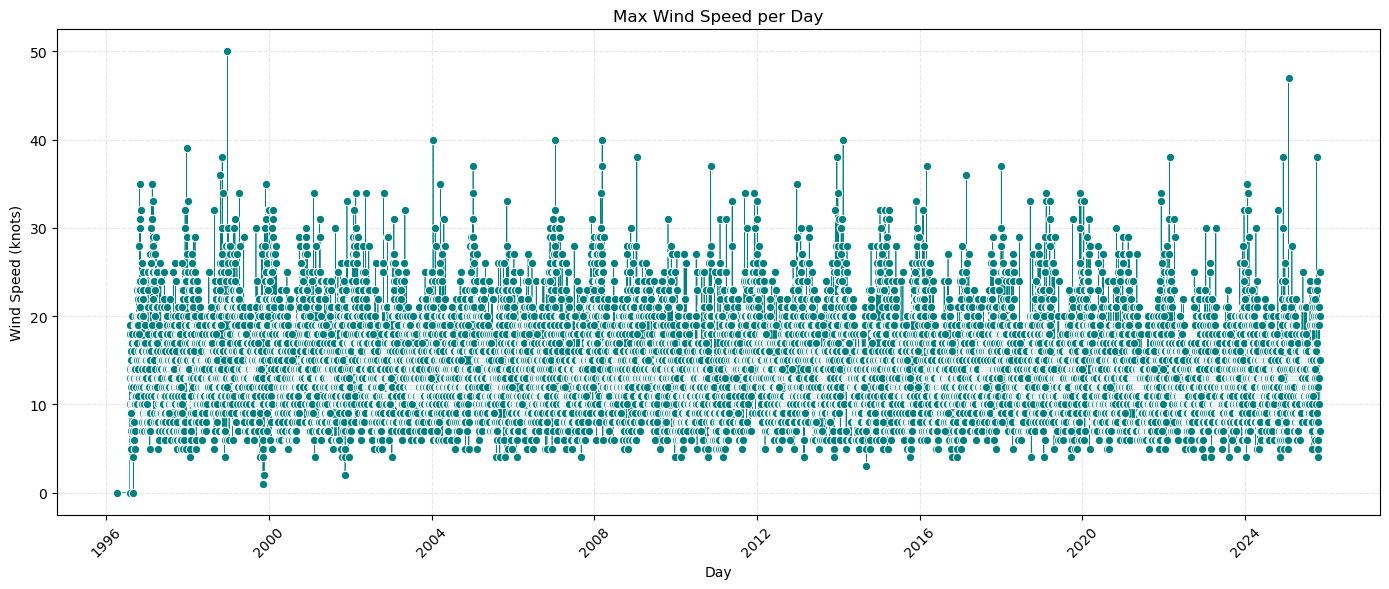

In [ ]:
# Plot daily max wind speed
plt.figure(figsize=(14,6)) # set the figure size
sns.lineplot(data=daily_max_wdsp, x='date', y='wdsp', linewidth=0.5, marker='o', color="teal") # plot daily max wind speed with markers

plt.title("Max Wind Speed per Day") # title of the plot
plt.xlabel("Day") # x-axis label
plt.ylabel("Wind Speed (knots)") # y-axis label
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.3) # add grid lines

plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot

### Monthly Mean of Daily Max Wind Speeds

In [ ]:
# Getting monthly mean of daily wind speed maxima

# Calculate monthly mean of daily maximum wind speed
monthly_mean_daily_max_wdsp = daily_max_wdsp['wdsp'].resample('ME').mean().reset_index() #  reset_index to turn the index back into a column

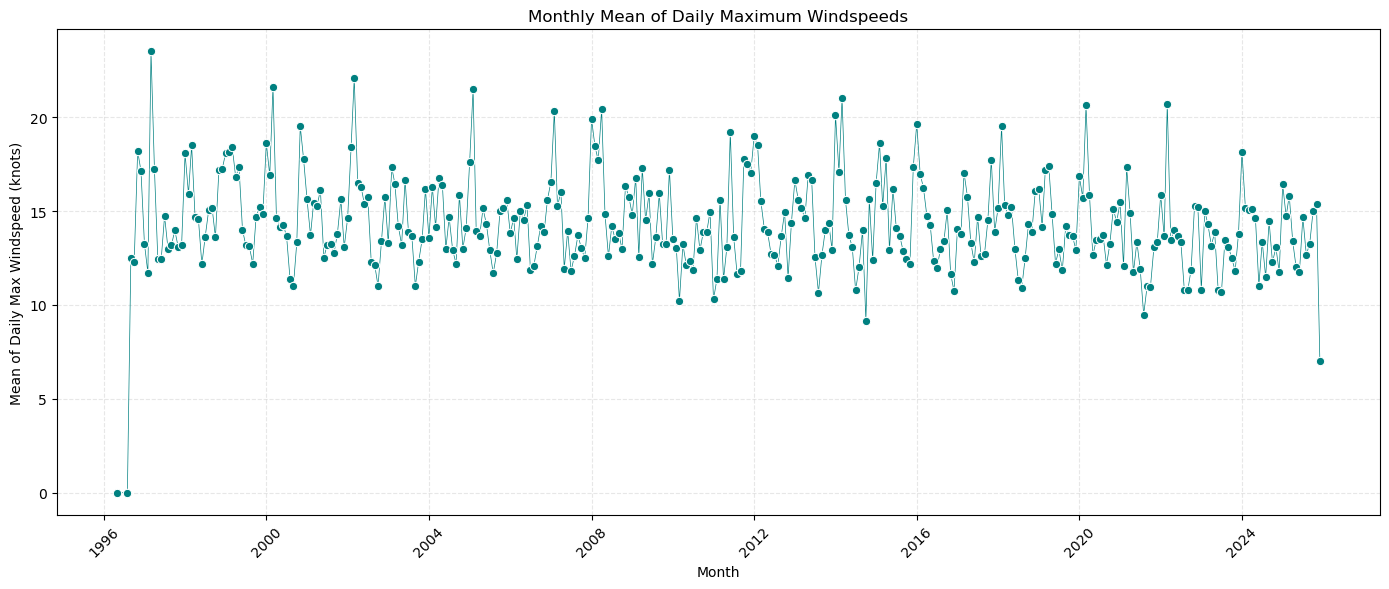

In [ ]:
# Plot monthly mean of daily max wind speed
plt.figure(figsize=(14, 6)) # set the figure size
sns.lineplot(data=monthly_mean_daily_max_wdsp, x="date", y="wdsp", linewidth=0.5, marker='o', color="teal") # plot monthly mean of daily max wind speed with markers

plt.title("Monthly Mean of Daily Maximum Windspeeds") # title of the plot
plt.xlabel("Month") # x-axis label
plt.ylabel("Mean of Daily Max Windspeed (knots)") # y-axis label
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.3) # add grid lines

plt.tight_layout() # adjust layout to prevent clipping
plt.show() # display the plot

## End